# DESARROLLO DE LABORATORIO 12 - ÍNDICES DEMOCRÁTICAS (Aplicación de Clusters)

In [1]:
#Importando librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.spatial.distance import pdist, squareform #Para hallar los pares de distancias y matriz de distancias
from scipy.cluster.hierarchy import linkage #Para utilizar los linkages
from scipy.cluster.hierarchy import dendrogram #Para el gráfico de dendograma
from sklearn.preprocessing import MinMaxScaler #Para escalamiento de datos - normalización
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering #Para métodos jerárquicos aglomerativos AGNES
from sklearn.metrics import silhouette_score #Para calcular métrica de silueta
from sklearn.metrics import calinski_harabasz_score #Para calcular métrica de CH
from sklearn.metrics import davies_bouldin_score #Para calcular métrica de DB
from sklearn.cluster import KMeans 
#Just in Case
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Estableciendo directorio
os.chdir("D:\Social Data Consulting\Python for Data Science\data")

In [3]:
miArchivo='democracias_latam.sav'
df_democracia=pd.read_spss(miArchivo)

In [4]:
df_democracia.head()

,tipoddem,pais,posicion,puntaj,ppelec,fdelgob,partpk,cultpk,libciv
0,Democracia plena,Costa Rica,25.0,8.04,9.58,8.21,6.11,6.88,9.41
1,Democracia plena,Uruguay,27.0,7.96,10.00,8.21,5.00,6.88,9.71
2,Democracia debil,Argentina,54.0,6.63,8.75,5.00,5.56,5.63,8.24
3,Democracia debil,Bolivia,81.0,5.98,8.33,5.71,4.44,3.75,7.65
4,Democracia debil,Brazil,42.0,7.38,9.58,7.86,4.44,5.63,9.41


In [5]:
df=df_democracia.iloc[:,4:]

In [6]:
df.head()

,ppelec,fdelgob,partpk,cultpk,libciv
0,9.58,8.21,6.11,6.88,9.41
1,10.00,8.21,5.00,6.88,9.71
2,8.75,5.00,5.56,5.63,8.24
3,8.33,5.71,4.44,3.75,7.65
4,9.58,7.86,4.44,5.63,9.41


## 1.Número óptimo de clúster para cada una de las funciones de enlace.

In [7]:
#Escalamiento de los datos
mms=MinMaxScaler()
x_mms=mms.fit_transform(df)

**EVALUANDO NÚMERO OPTIMO DE CLUSTER POR CADA LINNKAGE CON DENDOGRAMA**

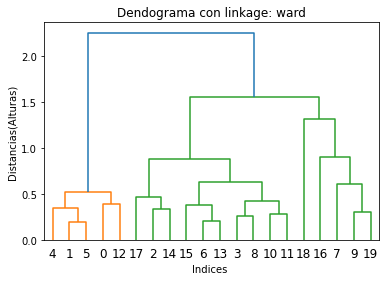

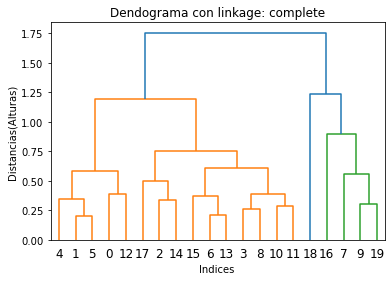

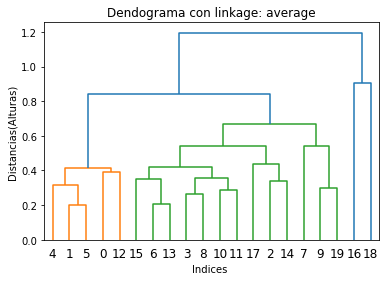

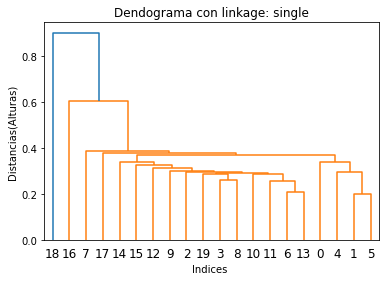

In [8]:
linkages=["ward","complete","average","single"]
clusters=[3,4,4,2]

for i in range(0,len(linkages)):
    clusters=linkage(x_mms,metric='euclidean',method=linkages[i])
    dendograma=dendrogram(clusters)
    plt.title('Dendograma con linkage: '+linkages[i])
    plt.xlabel('Indices ')
    plt.ylabel('Distancias(Alturas)')
    plt.show()

**EVALUANDO NÚMERO OPTIMO DE CLUSTER POR CADA LINNKAGE CON OTROS CRITERIOS**

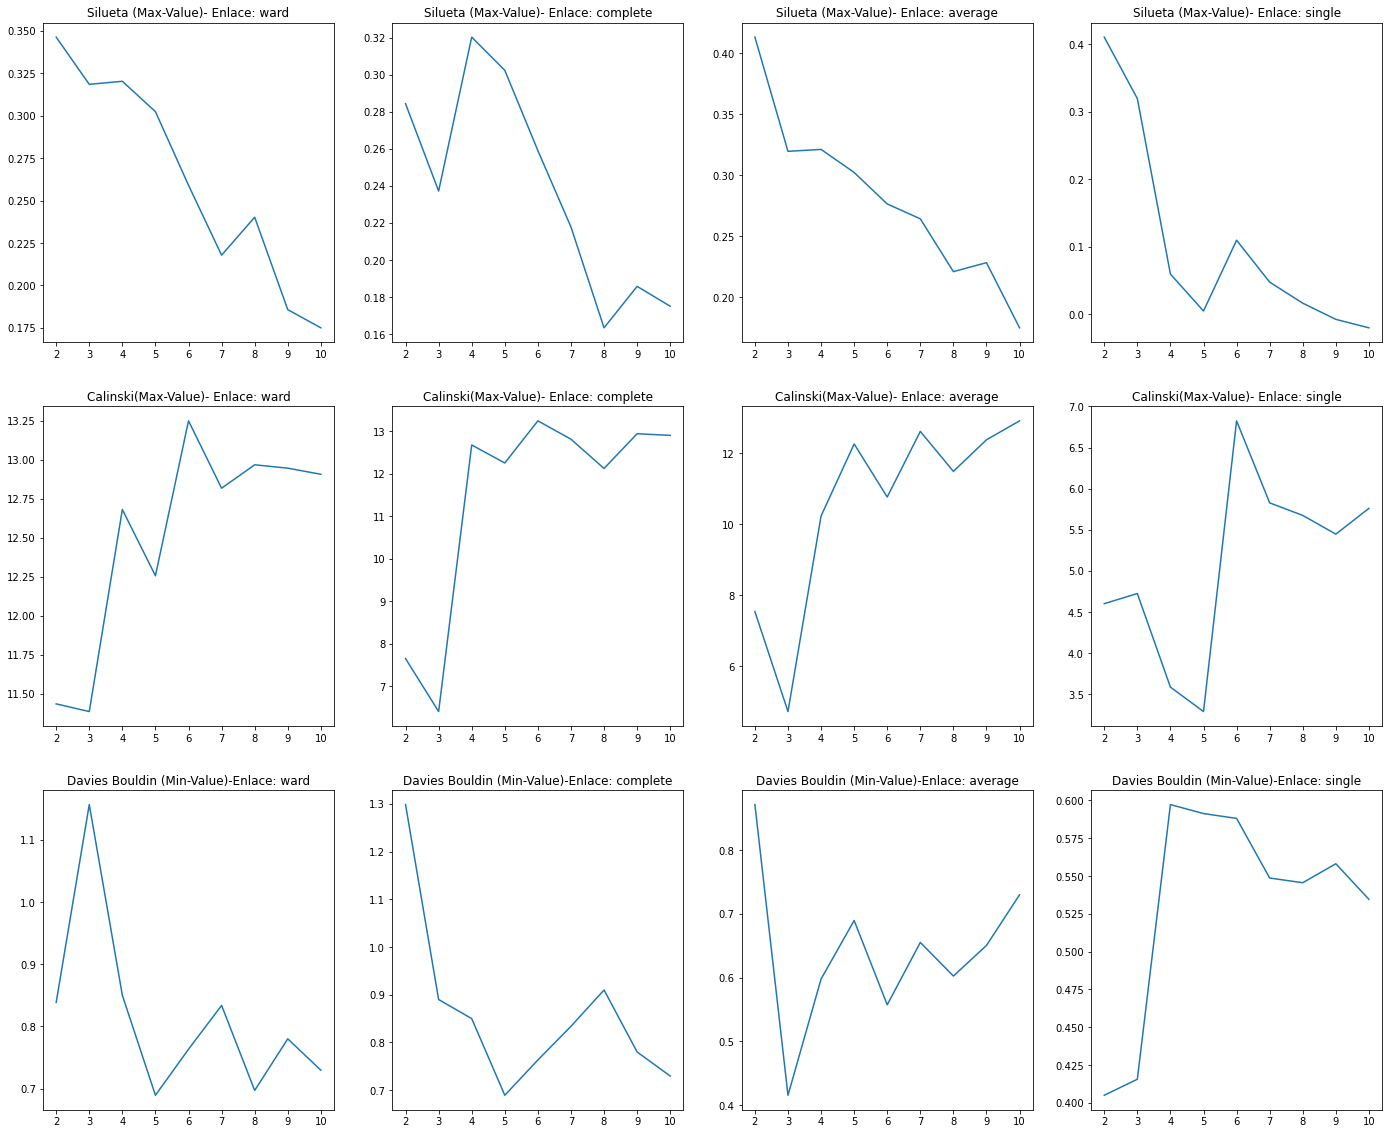

In [9]:
silueta=[]
calinski=[]
DB=[]
linkages=["ward","complete","average","single"]
fig, ax =plt.subplots(3,4)
fig.set_size_inches(24,20)
for a in range(len(linkages)):
    for i in range (2,11):
        hc=AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage=linkages[a])
        silueta.append(silhouette_score(x_mms,hc.fit_predict(x_mms)))
        calinski.append(calinski_harabasz_score(x_mms,hc.fit_predict(x_mms)))
        DB.append(davies_bouldin_score(x_mms,hc.fit_predict(x_mms)))

    ax[0][a].plot(range(2,11),silueta)
    ax[0][a].set_title("Silueta (Max-Value)- Enlace: "+ linkages[a])
    ax[1][a].plot(range(2,11),calinski)
    ax[1][a].set_title("Calinski(Max-Value)- Enlace: "+ linkages[a])
    ax[2][a].plot(range(2,11),DB)
    ax[2][a].set_title("Davies Bouldin (Min-Value)-Enlace: "+ linkages[a])
    silueta=[]
    calinski=[]
    DB=[]

plt.show()

**EVALUANDO LA VINCULACIÓN PARA K OPTIMO**

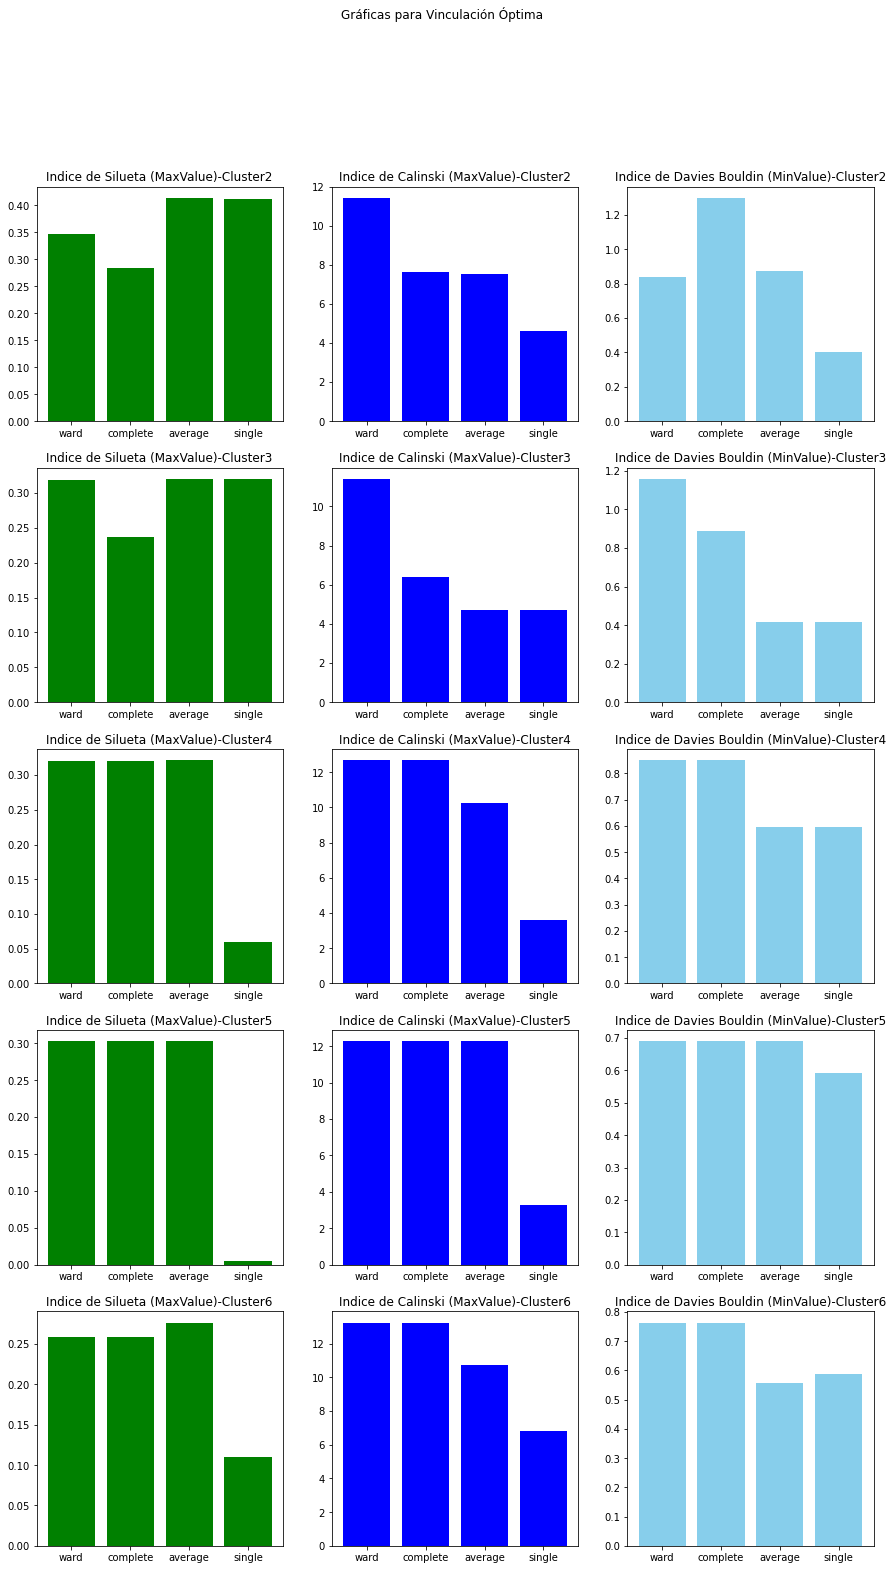

In [10]:
k_optimo=[2,3,4,5,6]
linkages=["ward","complete","average","single"]

fig, ax =plt.subplots(5,3)
fig.set_size_inches(15,25)
fig.suptitle("Gráficas para Vinculación Óptima")

silueta=[]
calinski=[]
DB=[]
for a in range(len(k_optimo)):
    for i in range(0,len(linkages)):
        hc=AgglomerativeClustering(n_clusters=k_optimo[a],affinity="euclidean",linkage=linkages[i])
        silueta.append(silhouette_score(x_mms,hc.fit_predict(x_mms)))
        calinski.append(calinski_harabasz_score(x_mms,hc.fit_predict(x_mms)))
        DB.append(davies_bouldin_score(x_mms,hc.fit_predict(x_mms)))

    #Acerca de gráficas
    ax[a][0].bar(linkages,silueta,color='green')
    ax[a][0].set_title("Indice de Silueta (MaxValue)-Cluster"+ str(k_optimo[a]))
    ax[a][1].bar(linkages,calinski,color='blue')
    ax[a][1].set_title("Indice de Calinski (MaxValue)-Cluster"+str(k_optimo[a]))
    ax[a][2].bar(linkages,DB,color='skyblue')
    ax[a][2].set_title("Indice de Davies Bouldin (MinValue)-Cluster"+str(k_optimo[a]))
    
    silueta=[]
    calinski=[]
    DB=[]
    
plt.show()

**_NUMERO DE CLUSTER ÓPTIMO PARA CADA LINKAGE -----
 WARD: 3 ---
 COMPLETE: 4 ---
 AVERAGE: 4 ---
 SINGLE: 2_**

## 2.Data Frame donde se muestre la data incial y la etiqueta de clúster teniendo en cuenta como enlace "Ward", "average" y "complete". Considerar distancia coseno para "average" y "complete".

In [11]:
#Ward
agnes_ward=AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward')
y_clust_ward=agnes_ward.fit_predict(x_mms)
y_clust_ward

array([1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 2, 1, 2, 2, 2, 0, 2, 0, 0],
      dtype=int64)

In [12]:
#average
agnes_Avg=AgglomerativeClustering(n_clusters=4, affinity='cosine',linkage='average')
y_clust_average=agnes_Avg.fit_predict(x_mms)
y_clust_average

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 3, 0],
      dtype=int64)

In [13]:
#complete
agnes_complete=AgglomerativeClustering(n_clusters=4, affinity='cosine',linkage='complete')
y_clust_complete=agnes_complete.fit_predict(x_mms)
y_clust_complete

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 3, 0],
      dtype=int64)

In [14]:
df['Cluster_Ward']=y_clust_ward
df['Cluster_Complete']=y_clust_complete
df['Cluster_Average']=y_clust_average
df.head(20)

,ppelec,fdelgob,partpk,cultpk,libciv,Cluster_Ward,Cluster_Complete,Cluster_Average
0,9.58,8.21,6.11,6.88,9.41,1,0,0
1,10.00,8.21,5.00,6.88,9.71,1,0,0
2,8.75,5.00,5.56,5.63,8.24,2,1,1
3,8.33,5.71,4.44,3.75,7.65,2,0,0
4,9.58,7.86,4.44,5.63,9.41,1,0,0
5,9.58,8.93,5.00,6.25,9.71,1,0,0
6,9.17,4.36,5.00,4.38,9.12,2,1,1
7,9.17,4.29,3.33,5.63,8.24,0,0,0
8,9.17,5.43,3.89,4.38,8.24,2,0,0
9,8.75,6.79,2.78,4.38,7.65,0,0,0


## 3.Realizando un análisis de componentes principales, visualizar las etiquetas predichas.

In [15]:
#Definimos nuestro dataframe a trabajar
df=df_democracia.iloc[:,4:] 

In [16]:
#Instanciando un objeto de clase StandardScaler
sc=StandardScaler()
X_Std=sc.fit_transform(df)

In [17]:
#Elijo 2 componentes 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_Std)
pca_data_df = pd.DataFrame(data = pca_data, columns = ['PC1 Values','PC2 Values'])
pca_data_df.head()

,PC1 Values,PC2 Values
0,-2.840816,-1.021193
1,-2.673388,0.051207
2,-0.685006,-1.001818
3,0.611028,0.406915
4,-1.654792,0.714988


In [18]:
#Librerías a utilizar
import random

#Grafico_de_cluster
def Grafico_de_cluster(X,n_clusters,init,n_init,max_iter,semilla,tol,name_colors_c_list,name_colors_edgecolor_list,name_makers_list):
    km = KMeans(n_clusters=n_clusters,
                    init=init, #elija k observaciones (filas) para los centroides iniciales
                    n_init=n_init, #número de veces que el algoritmo se ejecutará
                    max_iter=max_iter,#número máximo de iteraciones para una ejecución
                    tol=tol, #tolerancia para declarar convergencia
                    random_state=semilla) #semilla
    y_km = km.fit_predict(X)
    for i in range(0,km.n_clusters):
            plt.scatter(X[y_km == i, 0], #primer clúster
                        X[y_km == i, 1],
                        s=50,
                        c=name_colors_c_list[i],#El color de los puntos
                        edgecolor=name_colors_edgecolor_list[i],#El punto de colors
                        marker=name_makers_list[random.randint(0,1)],#El tipo de representación
                        label='cluster '+str(i+1))
    plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
                    s=250, marker='*', c='red', label='centroides')
    plt.title('Clustering', fontsize=20)
    plt.xlabel('PC1 Values')
    plt.ylabel('PC2 Values')
    plt.legend(bbox_to_anchor=(1.01,0.5),loc=2)
    plt.tight_layout()
    plt.show()


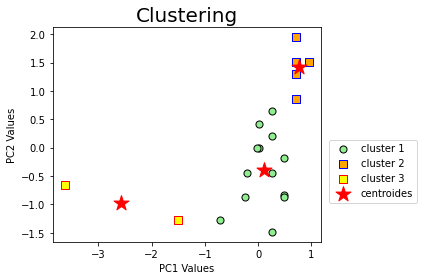

In [19]:
#Defino el numero de cluster en un array
name_colors_c_list=['lightgreen','orange','yellow']#Defino el color de los puntos
name_colors_edgecolor_list=['black','blue','red']#Defino los puntos de color
name_makers_list=['s','o','v']#Defino el tipo de representación del punto
n_clusters=3 #Se define el numero de clusters
init='k-means++' #elija k observaciones (filas) para los centroides iniciales
n_init=10 #número de veces que el algoritmo se ejecutará
max_iter=300#número máximo de iteraciones para una ejecución
tol=1e-04 #tolerancia para declarar convergencia
semilla = 2020
Grafico_de_cluster(X_Std,n_clusters,init,n_init,max_iter,semilla,tol,name_colors_c_list,name_colors_edgecolor_list,name_makers_list)

## 4.Teniendo en cuenta el enlace "ward" realizar un análisis clúster aglomerativo de k = 4 (k criterio de experto).

In [20]:
df.head()

,ppelec,fdelgob,partpk,cultpk,libciv
0,9.58,8.21,6.11,6.88,9.41
1,10.00,8.21,5.00,6.88,9.71
2,8.75,5.00,5.56,5.63,8.24
3,8.33,5.71,4.44,3.75,7.65
4,9.58,7.86,4.44,5.63,9.41


In [21]:
#Instanciando un objeto de clase StandardScaler
X_mms=MinMaxScaler()
x_minMax=X_mms.fit_transform(df)

In [22]:
x_minMax

array([[0.94909091, 0.87234043, 1.        , 1.        , 0.95568685],
       [1.        , 0.87234043, 0.66666667, 1.        , 1.        ],
       [0.84848485, 0.30319149, 0.83483483, 0.71461187, 0.78286558],
       [0.79757576, 0.42907801, 0.4984985 , 0.28538813, 0.6957164 ],
       [0.94909091, 0.81028369, 0.4984985 , 0.71461187, 0.95568685],
       [0.94909091, 1.        , 0.66666667, 0.85616438, 1.        ],
       [0.89939394, 0.18971631, 0.66666667, 0.42922374, 0.91285081],
       [0.89939394, 0.17730496, 0.16516517, 0.71461187, 0.78286558],
       [0.89939394, 0.37943262, 0.33333333, 0.42922374, 0.78286558],
       [0.84848485, 0.62056738, 0.        , 0.42922374, 0.6957164 ],
       [0.79757576, 0.55673759, 0.4984985 , 0.57077626, 0.60856721],
       [0.84848485, 0.4929078 , 0.66666667, 0.57077626, 0.82570162],
       [0.94909091, 0.68262411, 0.83483483, 0.71461187, 0.86853767],
       [0.74787879, 0.30319149, 0.66666667, 0.42922374, 0.82570162],
       [0.84848485, 0.        , 0.

In [23]:
#Ward
agnes=AgglomerativeClustering(n_clusters=4, affinity='euclidean',linkage='ward')
y_clust_w=agnes.fit_predict(x_minMax)
y_clust_w

array([1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 2, 1, 2, 2, 2, 0, 2, 3, 0],
      dtype=int64)

In [24]:
df['Cluster']=y_clust_w
df.head()

,ppelec,fdelgob,partpk,cultpk,libciv,Cluster
0,9.58,8.21,6.11,6.88,9.41,1
1,10.00,8.21,5.00,6.88,9.71,1
2,8.75,5.00,5.56,5.63,8.24,2
3,8.33,5.71,4.44,3.75,7.65,2
4,9.58,7.86,4.44,5.63,9.41,1


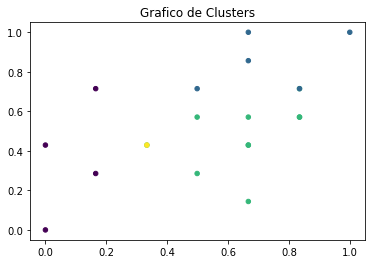

In [25]:
#Graficando los clusters
plt.scatter(x_minMax[:,2], #valores eje X
            x_minMax[:,3], #valores eje Y
            c=y_clust_w, 
            s=20)
plt.title('Grafico de Clusters')
plt.show()